<a href="https://colab.research.google.com/github/NatashaSikinyi/Autolib/blob/main/Moringa_Data_Science_Core_Week_4_2022_05_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Autolib Hypothesis Testing**

---



**Project Objective**

To understand autolib dataset and carry out hypothesis testing on the number of blue cars taken in postal codes 75015 and 75017

**Metric for Success**

Determine the number of blue cars taken in the respective postal codes

**Context**

Autolib is an electric car sharing company that aims to investigate claims about its blue cars

**Experimental design taken**
1. Loading dataset and appropriate libraries
2. Taking neccesary steps to clean the data
3. Carrying out univariate and bivariate analysis
4. Implement the solution by performing hypothesis testing


### **Importing Libraries**

In [64]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### **Loading Dataset**

In [18]:
#loading the data
Autolib = pd.read_csv('/content/autolib_daily_events_postal_code.csv')
Autolib.head(15)

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20
5,75001,1/6/2018,1437,5,weekend,187,185,6,6,7,8,38,35
6,75001,1/7/2018,1440,6,weekend,180,180,2,2,10,9,34,34
7,75001,1/8/2018,1438,0,weekday,84,83,3,3,10,10,14,15
8,75001,1/9/2018,1439,1,weekday,81,84,1,1,4,4,15,15
9,75001,1/10/2018,1440,2,weekday,88,85,5,5,11,11,23,22


### **Checking the Data**

In [5]:
#determing the number of records in our dataset
Autolib.shape

(16085, 13)

In [6]:
#checking for appropriate data type
Autolib.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16085 entries, 0 to 16084
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Postal code             16085 non-null  int64 
 1   date                    16085 non-null  object
 2   n_daily_data_points     16085 non-null  int64 
 3   dayOfWeek               16085 non-null  int64 
 4   day_type                16085 non-null  object
 5   BlueCars_taken_sum      16085 non-null  int64 
 6   BlueCars_returned_sum   16085 non-null  int64 
 7   Utilib_taken_sum        16085 non-null  int64 
 8   Utilib_returned_sum     16085 non-null  int64 
 9   Utilib_14_taken_sum     16085 non-null  int64 
 10  Utilib_14_returned_sum  16085 non-null  int64 
 11  Slots_freed_sum         16085 non-null  int64 
 12  Slots_taken_sum         16085 non-null  int64 
dtypes: int64(11), object(2)
memory usage: 1.6+ MB


In [7]:
#describing our data
Autolib.describe()

,Postal code,n_daily_data_points,dayOfWeek,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
count,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000
mean,88791.293876,1431.330619,2.969599,125.926951,125.912714,3.698290,3.699099,8.600560,8.599192,22.629033,22.629282
std,7647.342000,33.212050,2.008378,185.426579,185.501535,5.815058,5.824634,12.870098,12.868993,52.120263,52.146030
min,75001.000000,1174.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,91330.000000,1439.000000,1.000000,20.000000,20.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
50%,92340.000000,1440.000000,3.000000,46.000000,46.000000,1.000000,1.000000,3.000000,3.000000,0.000000,0.000000
75%,93400.000000,1440.000000,5.000000,135.000000,135.000000,4.000000,4.000000,10.000000,10.000000,5.000000,5.000000
max,95880.000000,1440.000000,6.000000,1352.000000,1332.000000,54.000000,58.000000,100.000000,101.000000,360.000000,359.000000


In [8]:
#inspecting the columns
Autolib.columns

Index(['Postal code', 'date', 'n_daily_data_points', 'dayOfWeek', 'day_type',
       'BlueCars_taken_sum', 'BlueCars_returned_sum', 'Utilib_taken_sum',
       'Utilib_returned_sum', 'Utilib_14_taken_sum', 'Utilib_14_returned_sum',
       'Slots_freed_sum', 'Slots_taken_sum'],
      dtype='object')

### **Cleaning the Dataset**

In [9]:
#checking for missing values
Autolib.isnull().sum()

Postal code               0
date                      0
n_daily_data_points       0
dayOfWeek                 0
day_type                  0
BlueCars_taken_sum        0
BlueCars_returned_sum     0
Utilib_taken_sum          0
Utilib_returned_sum       0
Utilib_14_taken_sum       0
Utilib_14_returned_sum    0
Slots_freed_sum           0
Slots_taken_sum           0
dtype: int64

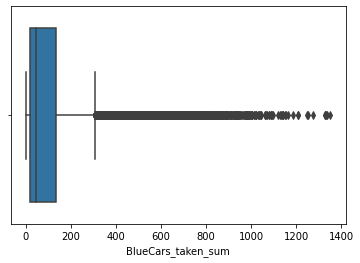

In [15]:
#checking for outliers

#
sns.boxplot(x=Autolib['BlueCars_taken_sum'])
plt.show()

In [16]:
#checking for anomalies
print(Autolib.nunique())

Postal code               104
date                      156
n_daily_data_points        23
dayOfWeek                   7
day_type                    2
BlueCars_taken_sum        932
BlueCars_returned_sum     929
Utilib_taken_sum           48
Utilib_returned_sum        49
Utilib_14_taken_sum        92
Utilib_14_returned_sum     94
Slots_freed_sum           297
Slots_taken_sum           301
dtype: int64


## **Exploratory Data Ananlysis**

### **Univariate Analysis**

In [49]:
#Filtering data from the dataset

#area15
area15 = Autolib[Autolib['Postal code']==75015]
area15.head()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
2184,75015,1/1/2018,1440,0,weekday,781,843,16,21,65,68,202,215
2185,75015,1/2/2018,1438,1,weekday,710,720,21,20,50,49,191,193
2186,75015,1/3/2018,1439,2,weekday,739,752,31,30,65,67,194,201
2187,75015,1/4/2018,1320,3,weekday,669,644,15,15,61,58,165,158
2188,75015,1/5/2018,1440,4,weekday,852,846,21,18,70,71,196,198


In [51]:
#area17
area17 = Autolib[Autolib['Postal code']==75017]
area17.head()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
2496,75017,1/1/2018,1440,0,weekday,634,671,16,15,63,67,159,171
2497,75017,1/2/2018,1438,1,weekday,548,542,13,15,40,33,125,126
2498,75017,1/3/2018,1439,2,weekday,638,616,15,13,27,26,153,144
2499,75017,1/4/2018,1320,3,weekday,553,534,16,17,30,30,141,145
2500,75017,1/5/2018,1440,4,weekday,705,703,12,13,40,42,179,180


In [52]:
area15["BlueCars_taken_sum"].max()

1352

In [53]:
area17["BlueCars_taken_sum"].max()

992

In [59]:
area15["BlueCars_taken_sum"].mean()

896.9551282051282

In [60]:
area17["BlueCars_taken_sum"].mean()

734.4935897435897

### **Conclusions**

The number of blue cars taken in the postal code 75015 is greater than those taken in 75017


### **Hypothesis Testing**

In [75]:
import math
from scipy import stats 

a = (84.6/math.sqrt(25))
b = ( 734.49 - 896.95 )
test_stat = b/a
test_stat

-9.6016548463357

In [79]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import random


In [80]:
np.random.seed(10)
pop_number = stats.norm.rvs(loc=815, scale=84.6, size=156)
print ( pop_number )  


pop_number.mean()


[ 927.65221825  875.51260123  684.25913529  814.2907263   867.56502339
  754.08076156  837.46228015  824.18320528  815.36305506  800.22882218
  851.63401567  916.77696182  733.35544427  901.991987    834.34210901
  852.65864205  718.84345288  826.43257992  940.59183036  723.64850666
  647.68418746  667.51070377  837.50953587 1016.76823618  910.06428004
  956.50383925  823.38802366  933.2704935   792.05242022  866.87707404
  792.38496584  768.52845741  826.22712182  774.71838554  925.69682264
  831.49812342  848.85776501  786.43630428  921.29755351  753.07538013
  870.85558923  785.31623798  735.52393776  773.60207145  746.93158936
  797.00577977  786.30873518  841.40957661  862.81191585  802.5282462
  812.80840851  839.45736964  769.32623057  874.91033769  886.25221287
  832.22293545 1017.59193005  892.61702611  805.50174894  784.35953417
  795.35738115  772.55373509  910.49522395  755.96527142  808.13706325
  770.22155155  903.50706969  694.99015993  784.33256911  804.68677853
  842.0

823.6134154106348